<a href="https://colab.research.google.com/github/ManishRawat07/ML_Projects/blob/main/ANN/Reegression/Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Read the Excel file
df = pd.read_excel('/content/Folds5x2_pp.xlsx')
# names=['Atm_Temp','Vacuum','Atm_Pres','Rel_Humid','Energy']
df


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [ ]:
X = df.iloc[:,:-1].values
X

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [ ]:
y = df.iloc[:,-1].values
y = y.reshape(len(y),1)
y

array([[463.26],
       [444.37],
       [488.56],
       ...,
       [429.57],
       [435.74],
       [453.28]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train = {X_train.shape}')
print(f'y_train = {y_train.shape}')
print('\n')
print(f'X_test = {X_test.shape}')
print(f'y_test = {y_test.shape}')

X_train = (7654, 4)
y_train = (7654, 1)


X_test = (1914, 4)
y_test = (1914, 1)


In [ ]:
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.25, random_state=42)

print(f'X_train_scaled = {X_train_scaled.shape}')
print(f'y_train = {y_train.shape}')
print('\n')
print(f'X_val_scaled = {X_val_scaled.shape}')
print(f'X_test = {y_test.shape}')

X_train_scaled = (5740, 4)
y_train = (5740, 1)


X_val_scaled = (1914, 4)
X_test = (1914, 1)


In [ ]:
# Implementing & Training Neural Network

ann = tf.keras.models.Sequential()

# Input Layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Hidden Layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Output layer
ann.add(tf.keras.layers.Dense(units=1))

ann.compile(optimizer='adam', loss='mean_squared_error')

Epoch 1/50
479/479 [==============================] - 7s 7ms/step - loss: 204170.5625 - val_loss: 198987.2969
Epoch 2/50
479/479 [==============================] - 3s 5ms/step - loss: 184868.7188 - val_loss: 166276.9844
Epoch 3/50
479/479 [==============================] - 3s 6ms/step - loss: 144412.4062 - val_loss: 125260.0234
Epoch 4/50
479/479 [==============================] - 4s 8ms/step - loss: 111812.6406 - val_loss: 100541.7188
Epoch 5/50
479/479 [==============================] - 2s 3ms/step - loss: 84969.3047 - val_loss: 66241.5078
Epoch 6/50
479/479 [==============================] - 1s 2ms/step - loss: 39467.8047 - val_loss: 14316.5205
Epoch 7/50
479/479 [==============================] - 1s 2ms/step - loss: 5726.3345 - val_loss: 2170.6362
Epoch 8/50
479/479 [==============================] - 1s 2ms/step - loss: 1554.7683 - val_loss: 1100.7758
Epoch 9/50
479/479 [==============================] - 1s 2ms/step - loss: 865.6373 - val_loss: 650.3591
Epoch 10/50
479/479 [=======

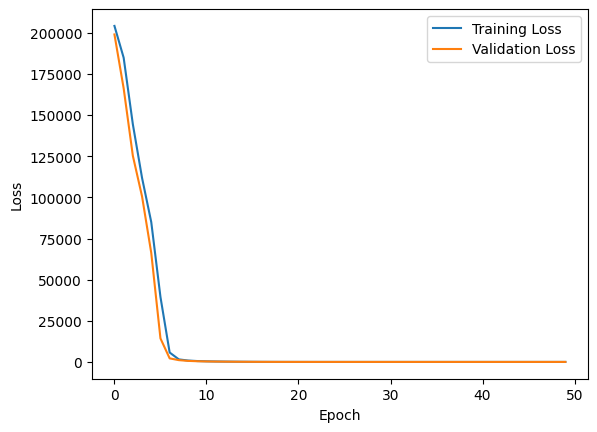

In [ ]:
history = ann.fit(X_train_scaled, y_train, epochs=50, batch_size=12, validation_data=(X_val_scaled, y_val))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
np.set_printoptions(precision=2)
y_pred = ann.predict(X_test_scaled, batch_size=32)

60/60 [==============================] - 0s 1ms/step


In [ ]:
# Assuming y_test and y_pred_rounded are already defined as described
y_test = y_test.reshape(len(y_test), 1)

# Concatenate actual and predicted values into a DataFrame
df = np.concatenate((y_test, y_pred), axis=1)
df = pd.DataFrame(df, columns=['Actual', 'Predicted'])

# Display the DataFrame
df


,Actual,Predicted
0,455.27,455.358032
1,436.31,440.019714
2,440.68,434.664368
3,434.40,440.257874
4,482.06,480.640808
...,...,...
1909,430.24,433.586914
1910,473.20,476.121399
1911,479.53,483.030762
1912,435.76,435.476257


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
r2


0.9357310597353394